<a href="https://colab.research.google.com/github/izvyk/TrainHuntModels/blob/master/yolo_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 51.8 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

# Load the YOLO11 model
model = YOLO("yolo11s.pt")

# Export the model to TFLite format
# model.export(format="tflite")  # creates 'yolo11n_float32.tflite'

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 18.4M/18.4M [00:00<00:00, 364MB/s]


In [ ]:
import tensorflow as tf

# Load and inspect the model
interpreter = tf.lite.Interpreter(model_path="yolo11n_saved_model/yolo11n_float32.tflite")
interpreter.allocate_tensors()

# Get output details
output_details = interpreter.get_output_details()
print(f"Number of outputs: {len(output_details)}")
for output in output_details:
    print(f"Output {output['index']}: shape={output['shape']}, dtype={output['dtype']}")

Number of outputs: 1
Output 973: shape=[   1   84 8400], dtype=<class 'numpy.float32'>


In [5]:
!rm -rf /content/datasets/

In [4]:
!mkdir datasets

In [5]:
!curl -L "https://app.roboflow.com/ds/vGFxMhMR1R?key=sM0i18cxWN" > roboflow.zip
!unzip roboflow.zip -d datasets/th
!rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   905  100   905    0     0   2411      0 --:--:-- --:--:-- --:--:--  2413
100 7376k  100 7376k    0     0  2764k      0  0:00:02  0:00:02 --:--:-- 3531k
Archive:  roboflow.zip
  inflating: datasets/th/README.dataset.txt  
  inflating: datasets/th/README.roboflow.txt  
  inflating: datasets/th/data.yaml   
   creating: datasets/th/test/
   creating: datasets/th/test/images/
 extracting: datasets/th/test/images/20241211_122149_jpg.rf.e2a38419695e4c55045eaf3a085481f1.jpg  
 extracting: datasets/th/test/images/20241211_122221_jpg.rf.195d5c0256260da662582d472aff2e39.jpg  
 extracting: datasets/th/test/images/20241211_122303_jpg.rf.581c3b54d8801f1edd9748142feb864b.jpg  
 extracting: datasets/th/test/images/20241211_122327_jpg.rf.da7e89cc58027086b835ce646942d030.jpg  
 extracting: datasets/th/test/images/20241211_122428_jpg.rf.7abb6

In [ ]:
!rm -rf /content/datasets/

In [6]:
# model.train(data="/content/datasets/th/data.yaml", epochs=10, imgsz=640, task="detect", mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True)
!yolo task=detect mode=train model=/content/yolo11s.pt data=/content/datasets/th/data.yaml epochs=10 imgsz=640 plots=True

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolo11s.pt, data=/content/datasets/th/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

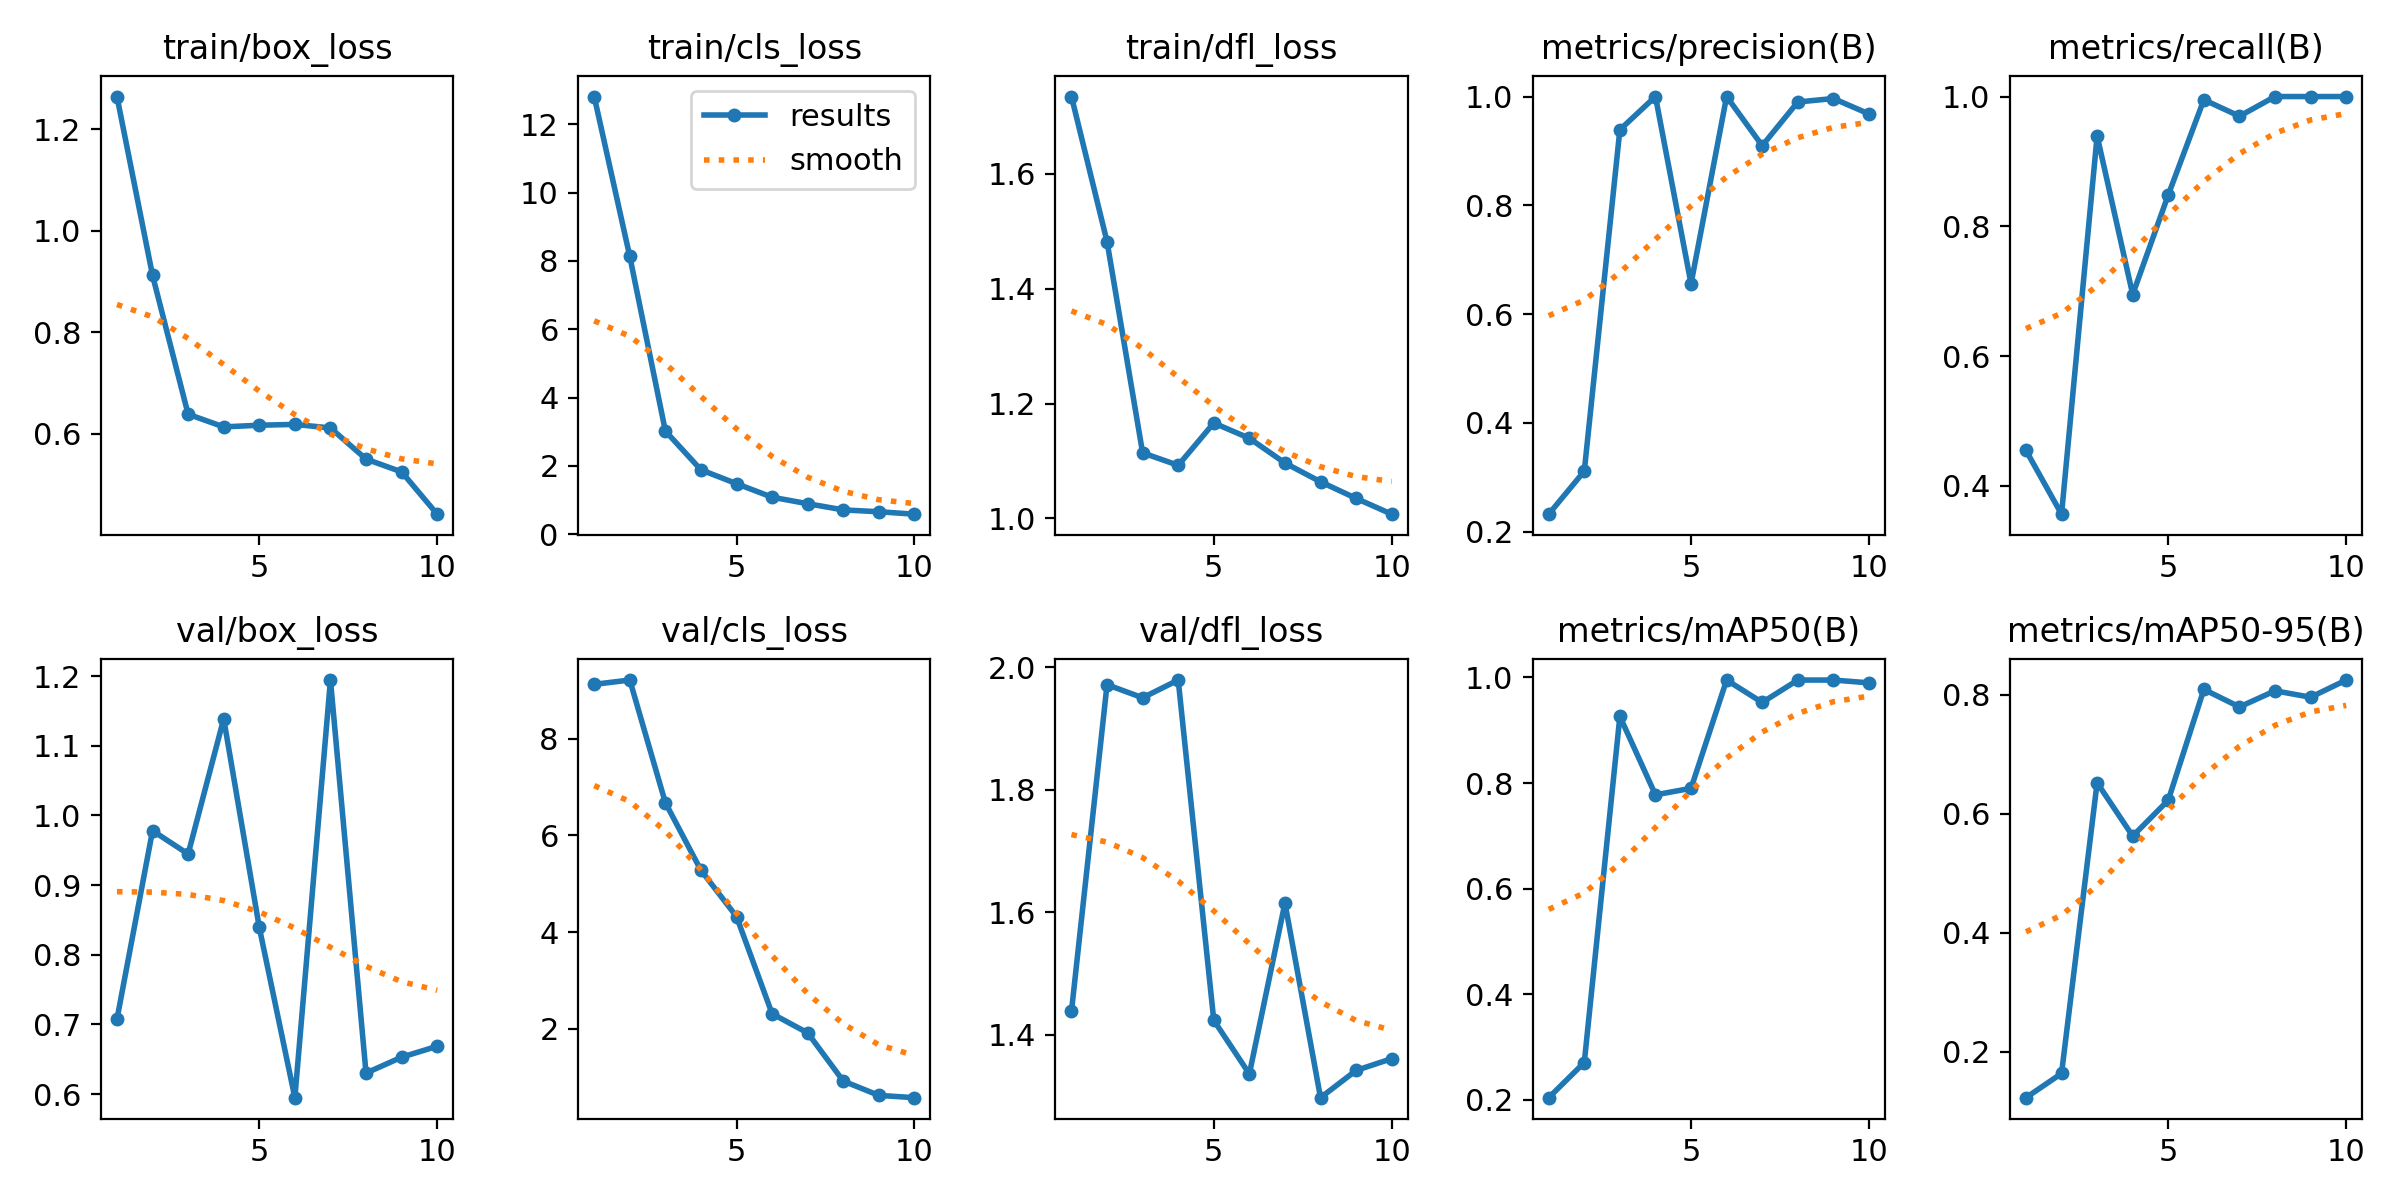

In [7]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'runs/detect/train/results.png', width=600)

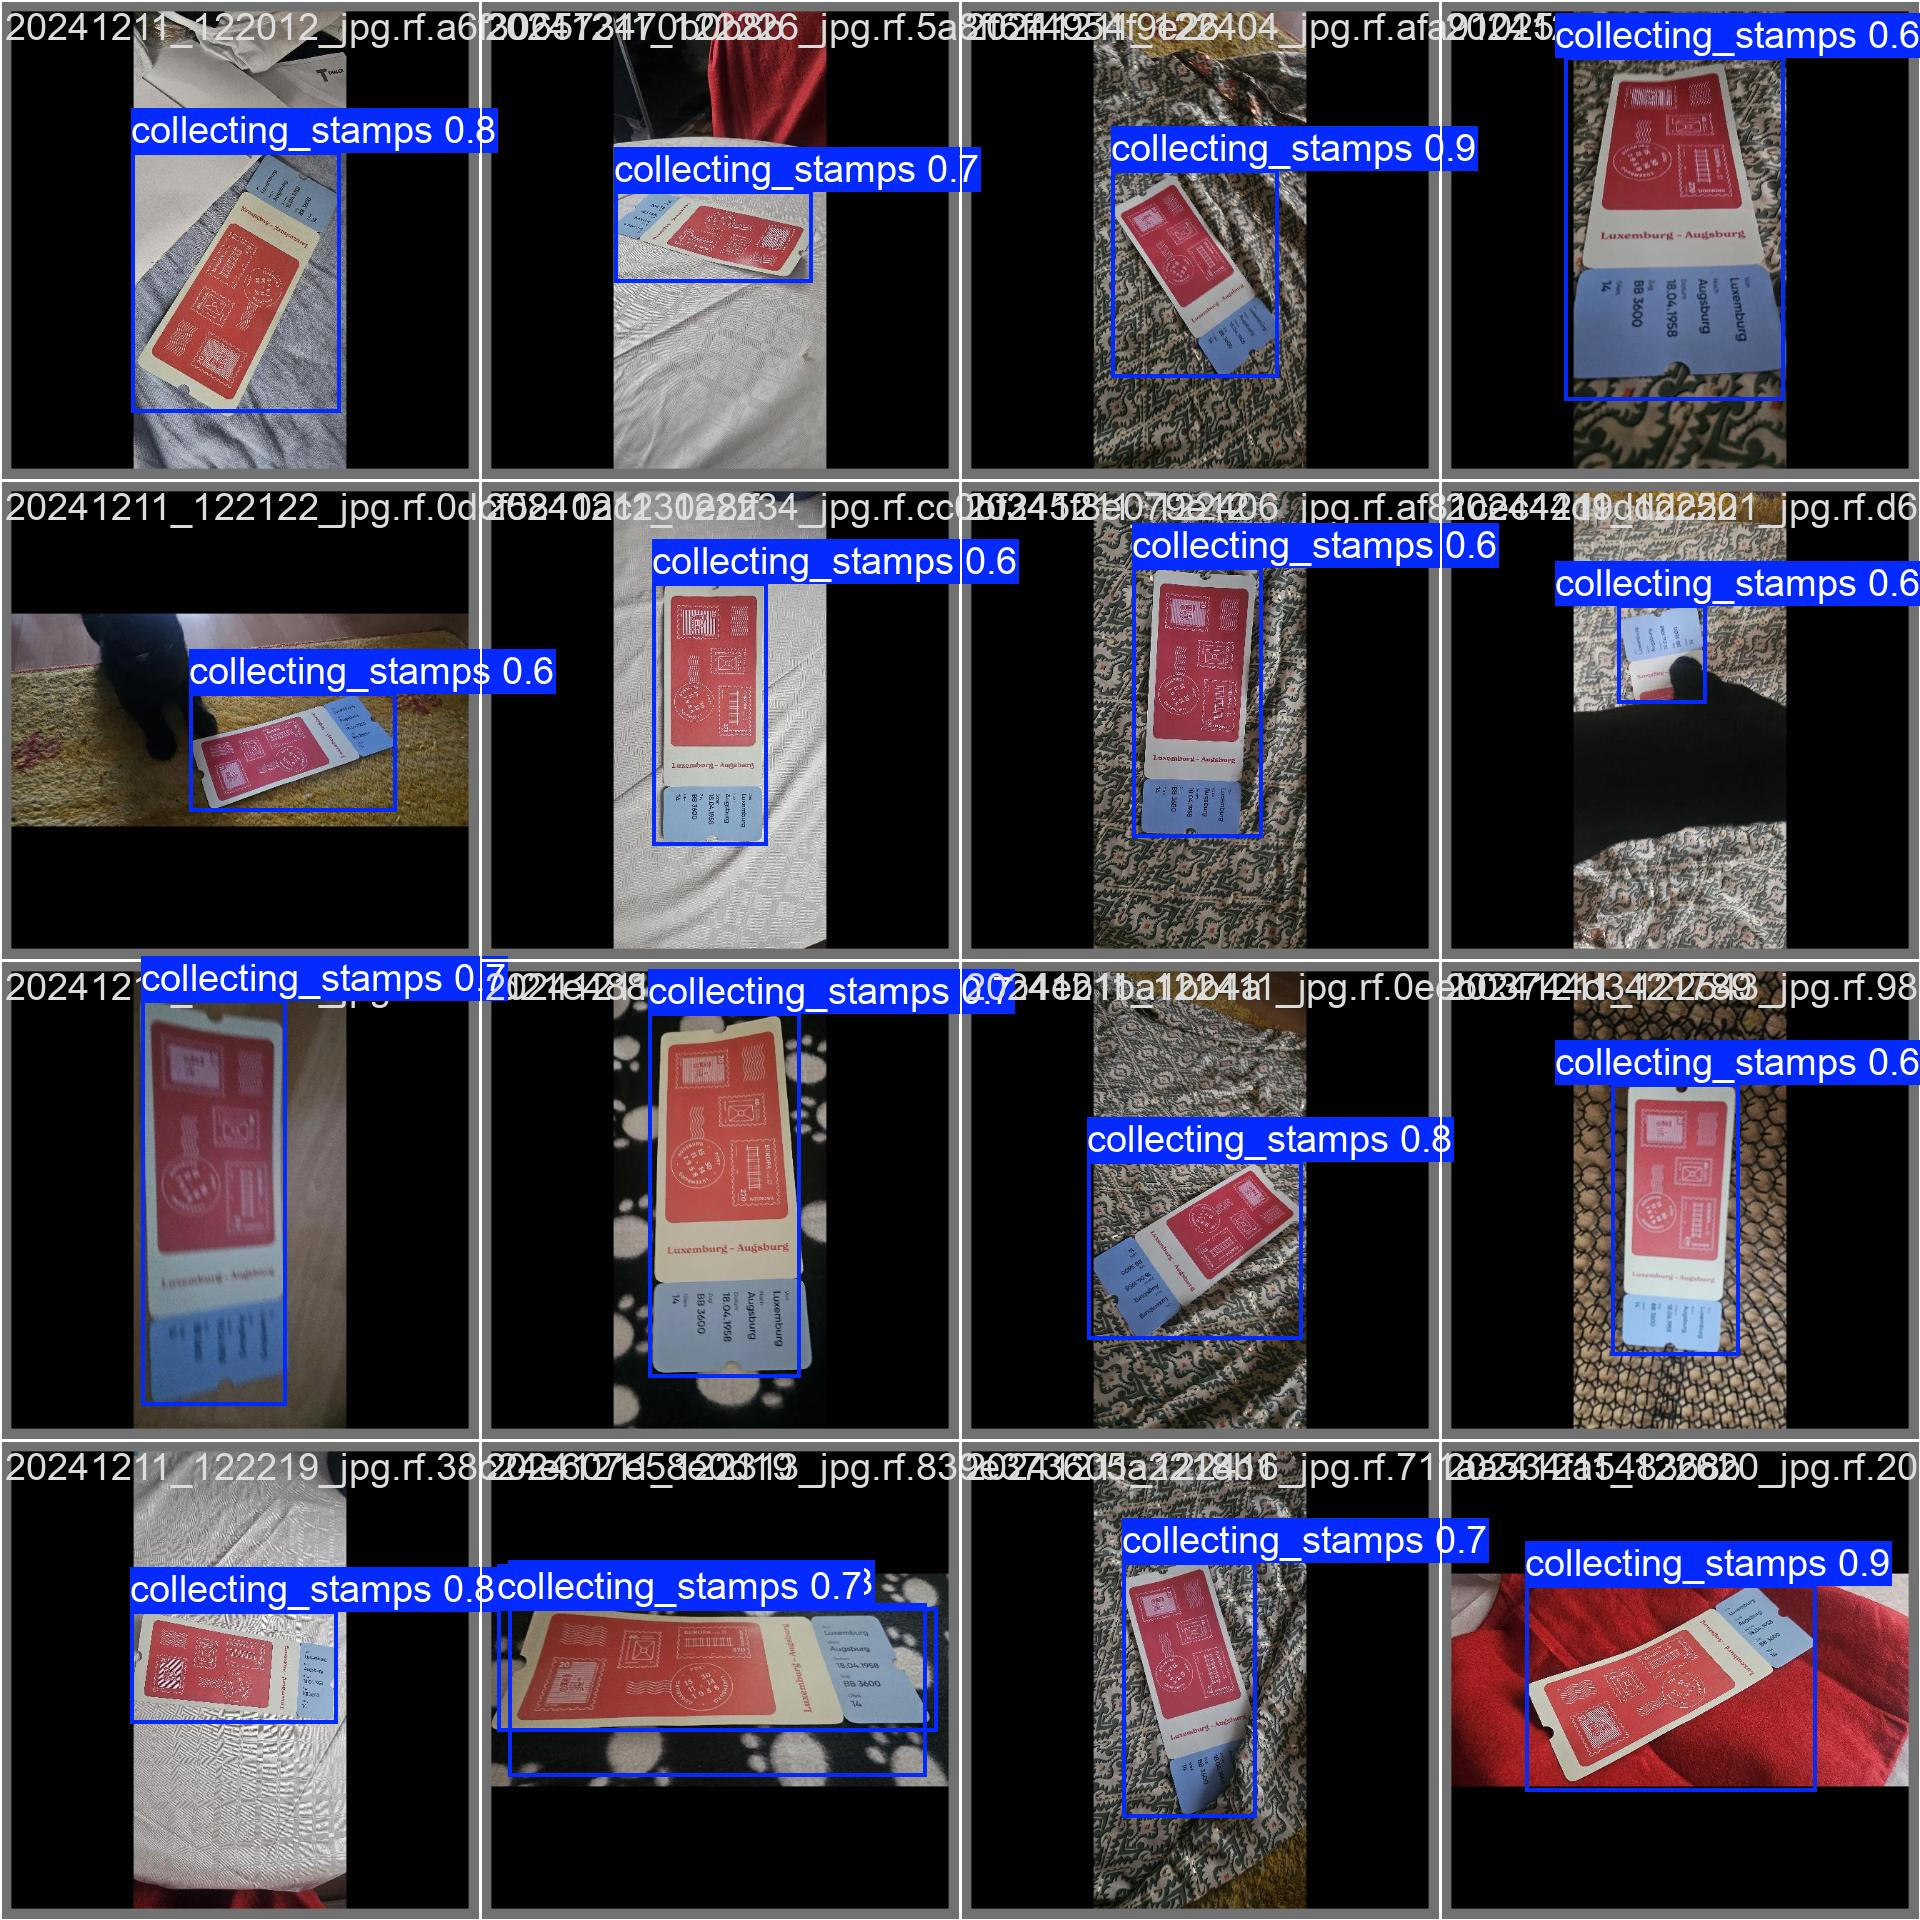

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'runs/detect/train/val_batch0_pred.jpg', width=600)

In [10]:
!tensorboard --logdir runs/detect/train

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [10]:
model.export(format="tflite", int8=True, data="/content/datasets/th/data.yaml")

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLO11s summary (fused): 238 layers, 9,443,760 parameters, 0 gradients, 21.5 GFLOPs

PyTorch: starting from 'yolo11s.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (18.4 MB)

TensorFlow SavedModel: starting export with tensorflow 2.17.1...

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.44...
ONNX: export success ✅ 2.9s, saved as 'yolo11s.onnx' (36.4 MB)
TensorFlow SavedModel: collecting INT8 calibration images from 'data=/content/datasets/th/data.yaml'


Scanning /content/datasets/th/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<?, ?it/s]

TensorFlow SavedModel: WARNING ⚠️ >300 images recommended for INT8 calibration, found 33 images.


TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
TensorFlow SavedModel: export success ✅ 652.4s, saved as 'yolo11s_saved_model' (319.3 MB)

TensorFlow Lite: starting export with tensorflow 2.17.1...
TensorFlow Lite: export success ✅ 0.0s, saved as 'yolo11s_saved_model/yolo11s_int8.tflite' (10.0 MB)

Export complete (653.4s)
Results saved to /content
Predict:         yolo predict task=detect model=yolo11s_saved_model/yolo11s_int8.tflite imgsz=640 int8 
Validate:        yolo val task=detect model=yolo11s_saved_model/yolo11s_int8.tflite imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml int8 
Visualize:       https://netron.app


'yolo11s_saved_model/yolo11s_int8.tflite'

In [12]:
from ultralytics import YOLO

tflite_model = YOLO("/content/runs/detect/train/weights/best_saved_model/best_float32.tflite")

# Run inference
results = tflite_model("/content/datasets/th/test/images/20241211_122149_jpg.rf.9cb9e23f8d1c9bfb967e638328529f9c.jpg", imgsz=320)

Loading /content/runs/detect/train/weights/best_saved_model/best_float32.tflite for TensorFlow Lite inference...

image 1/1 /content/datasets/th/test/images/20241211_122149_jpg.rf.9cb9e23f8d1c9bfb967e638328529f9c.jpg: 320x320 1 collecting_stamps, 290.2ms
Speed: 1.1ms preprocess, 290.2ms inference, 14.6ms postprocess per image at shape (1, 3, 320, 320)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'collecting_stamps'}
obb: None
orig_img: array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
 